<a href="https://colab.research.google.com/github/lazic7/MSAP/blob/master/LV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [20]:
#Učitavanje i čišćenje podataka
df = pd.read_csv('processed_data2.csv').convert_dtypes()
df.head()

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000,8,2024-09-20,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512,8,2024-09-20,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128,4,2020-11-13,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


Vidimo da je učitani csv popunjem podatcima o mobitelima. Neke od osnovnih varijabli vidimo da su brand mobitela, naziv i model. Gdje se moze kupiti, koja je njegova cijena i njegove osnovne specifikacije poput kolicine ram memorije, prostora za pohranu i njegove dimenzije.

Naredba info daje osnovne podatke o datasetu. Vidimo da se u datasetu nalazi 1708 redaka od 38 razlicitih varijabli koje opisuju jedan mobitel.

In [23]:
df.info()
print("Shape: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone_brand         1708 non-null   string 
 1   phone_model         1708 non-null   string 
 2   store               1708 non-null   string 
 3   price_usd           1708 non-null   Float64
 4   storage             1708 non-null   Int64  
 5   ram                 1708 non-null   Int64  
 6   launch_date         1708 non-null   string 
 7   dimensions          1708 non-null   string 
 8   weight              1708 non-null   Float64
 9   display_type        1708 non-null   string 
 10  display_size        1708 non-null   Float64
 11  display_resolution  1708 non-null   string 
 12  os                  1708 non-null   string 
 13  nfc                 1708 non-null   Int64  
 14  usb                 1708 non-null   string 
 15  battery             1708 non-null   Int64  
 16  featur

Provjerit ce mo da li u datasetu ima duplikata ili redaka u kojim imamo null vrijednosti. Vidimo da ima nekoliko redaka u kojima nemamo informacije o broju jezgri procesora i nekim mobitelima nije naveden proizvođač graficke kartice. Osim toga u datasetu nema duplikata.

In [25]:
df.isnull().sum()

,0
phone_brand,0
phone_model,0
store,0
price_usd,0
storage,0
ram,0
launch_date,0
dimensions,0
weight,0
display_type,0


In [26]:
df.duplicated().sum()

np.int64(0)

**Eksplorativna Analiza Podataka (EDA)**

Glavne komponente EDA-e su:

*   Deskriptivna statistika: mjere centralne tedencije i disperzija
*   Vizualizacija podataka
*   Identifikacija outliera
*   Provjera distribucije podataka: skewness i kurtosis


Prvo rjesavamo deskriptivnu statistiku. Radimo mjere centralne tedencije, a to su mean, median, mod. Za daljnju analizu, odabirem cetiri varijable: price, ram, storage, battery pošto se za daljnju analizu mogu koristiti samo kvantitativne odnosno numericke varijable

In [34]:
df_selected=df[["price_usd", "ram", "storage", "battery"]]
df_selected.mean() #srednja vrijednost

,0
price_usd,419.983156
ram,7.981265
storage,271.798595
battery,4657.326698


In [35]:
df_selected.median() #sredisnja vrijednost

,0
price_usd,278.835
ram,8.0
storage,256.0
battery,5000.0


In [37]:
df_selected.mode() #vrijednost koja se najcesce pojavljuje

,price_usd,ram,storage,battery
0,999.99,8,256,5000


Sada računamo disperziju: varijancu, standardnu devijaciju i raspon.

In [38]:
df_selected.var() #varijanca - koliko su vrijendnosti udaljene od sredine u kvadratnim jedinicama

,0
price_usd,130812.930709
ram,11.734857
storage,43061.686419
battery,482593.928355


In [39]:
df_selected.std() #standardna devijacija - prosjecna udaljenost od sredine

,0
price_usd,361.680703
ram,3.425618
storage,207.513099
battery,694.689807


In [40]:
df_selected.max() - df_selected.min() #raspon

,0
price_usd,2301.19
ram,22.0
storage,968.0
battery,8379.0


Osim toga, naredbom df_selected.describe() mogu dobiti sve podatke odmah na jednom mjestu.

In [41]:
df_selected.describe()

,price_usd,ram,storage,battery
count,1708.0,1708.0,1708.0,1708.0
mean,419.983156,7.981265,271.798595,4657.326698
std,361.680703,3.425618,207.513099,694.689807
min,52.63,2.0,32.0,1821.0
25%,167.5625,6.0,128.0,4500.0
50%,278.835,8.0,256.0,5000.0
75%,550.3275,12.0,256.0,5000.0
max,2353.82,24.0,1000.0,10200.0


Konačno, računa se oblik distribucije podataka (Skewness i Kurtosis)
Skewness ili asimetrija raspodjele pokazuje u kojem smjeru i koliko distribucija odstupa od simetricne krivulje.

skew = 0 - simetricna distribucija

skew > 0 - desno nagnuta

skew < 0 - lijevo nagnuta.

Kurtosis ili šiljastost raspodjele pokazuje koliko su ekstremne vrijednosti izražene.

kurtosis = 0 - normalna distribucija

kurtosis > 0 - siljasta, izrazeni repovi

kurtosis < 0 - pljosnata, kraci repovi

In [45]:
shape_measures = pd.DataFrame({
    "Skewness": df_selected.skew(),
    "Kurtosis": df_selected.kurtosis()
})
shape_measures


,Skewness,Kurtosis
price_usd,1.811629,3.736745
ram,0.716986,0.306426
storage,1.806249,3.666509
battery,-0.739636,7.021588


**Vizualizacija podataka**

Histogram — raspodjela vrijednosti

Histogram pokazuje kako su vrijednosti raspoređene (koliko često se pojavljuju unutar određenih intervala, vizualni skewness i kurtosis).

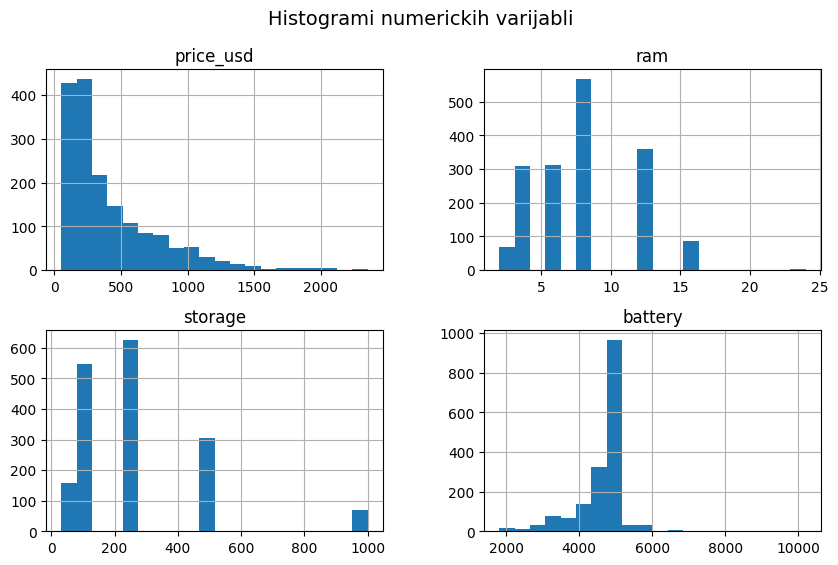

In [47]:
df_selected.hist(bins=20, figsize=(10,6))
plt.suptitle("Histogrami numerickih varijabli", fontsize=14)
plt.show()

Boxplot — detekcija outliera

Boxplot prikazuje raspon podataka, medijan i moguće outliere.
Koristi se za usporedbu varijabli ili grupa.

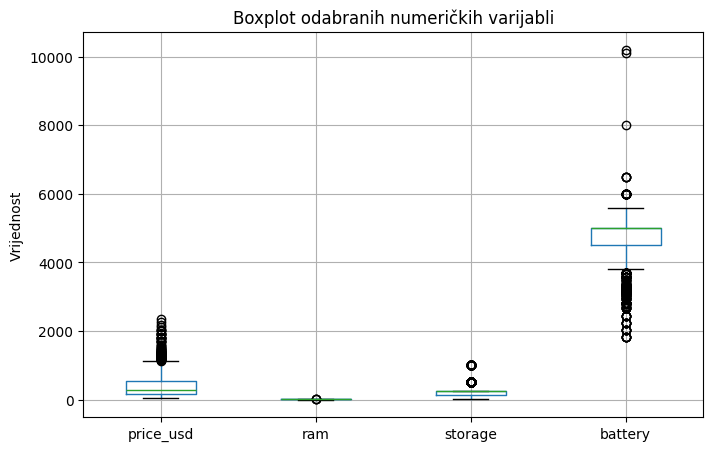

In [48]:
plt.figure(figsize=(8,5))
df_selected.boxplot()
plt.title("Boxplot odabranih numeričkih varijabli")
plt.ylabel("Vrijednost")
plt.show()

Stupčasti graf (bar chart)

Koristan kad želim usporediti prosječne vrijednosti između kategorija, npr. prosječna cijena po operativnom sustavu (os).

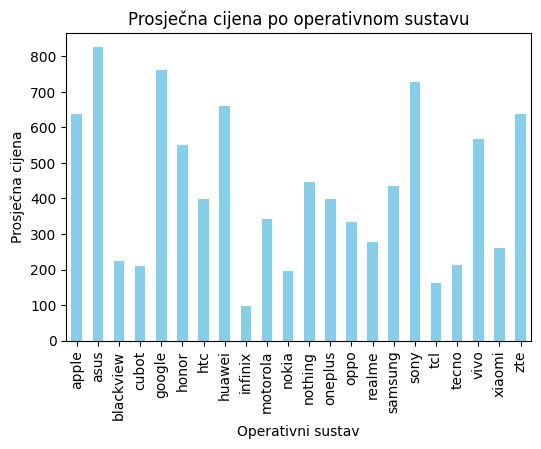

In [54]:
avg_price_by_os = df.groupby("phone_brand")["price_usd"].mean()

avg_price_by_os.plot(kind="bar", color="skyblue", figsize=(6,4))
plt.title("Prosječna cijena po operativnom sustavu")
plt.ylabel("Prosječna cijena")
plt.xlabel("Operativni sustav")
plt.show()


Pie chart (kružni grafikon)

Koristi se za kategorijske varijable — prikazuje udio svake kategorije u ukupnom skupu podataka.

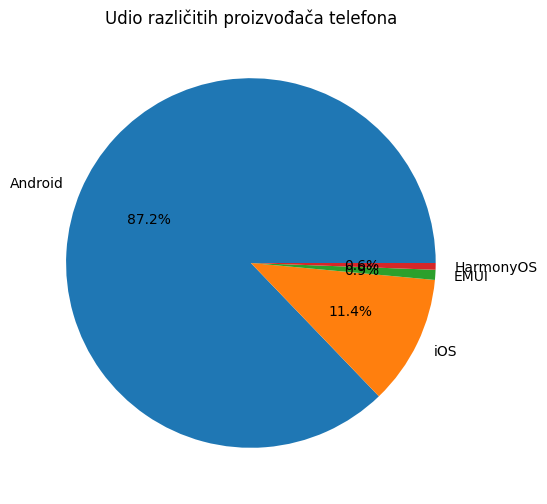

In [55]:
df["os_type"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Udio različitih proizvođača telefona")
plt.ylabel("")  # makne oznaku osi y
plt.show()